# Neural networks, from ANN to SNN in FPGA.
### Developed by:
### Gabriel Sampaio
### Luiz Felipe Machado
### Marcos Beleza Filho
[<img src='https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/snntorch_alpha_w.png?raw=true' width="200">](https://github.com/jeshraghian/snntorch/)

## 1. Desenvolvimento de ANN para classificação RGB

A estrutura da criação de uma rede neural para a sua utilização em hardware normalmente envolve o treinamento sendo realizado anteriormente em um ambiente separado. Seguiremos esta premissa pois a intenção aqui é seguir na comparação prática e na aplicação da spiking neural network em nosso hardware. Mas os argumentos para o treinamento a ser realizado de forma separada envolvem principalmente limitações em relação ao acesso de memória e complexidade da sequência de operações.

### 1.1 O caso: classificação de cores, pixel a pixel, em RGB

Este caso foi utilizado de início por conta da facilidade de implementação, para implementá-lo, teremos que criar imagens com labels nas cores que pretendemos selecionar, como no seguinte exemplo.

Imagem 1 - Width: 1280, Height: 720
Imagem 2 - Width: 1280, Height: 720
Imagem 3 - Width: 2606, Height: 1522
Imagem 4 - Width: 2606, Height: 1522
Imagem 5 - Width: 1902, Height: 928
Imagem 6 - Width: 1902, Height: 928


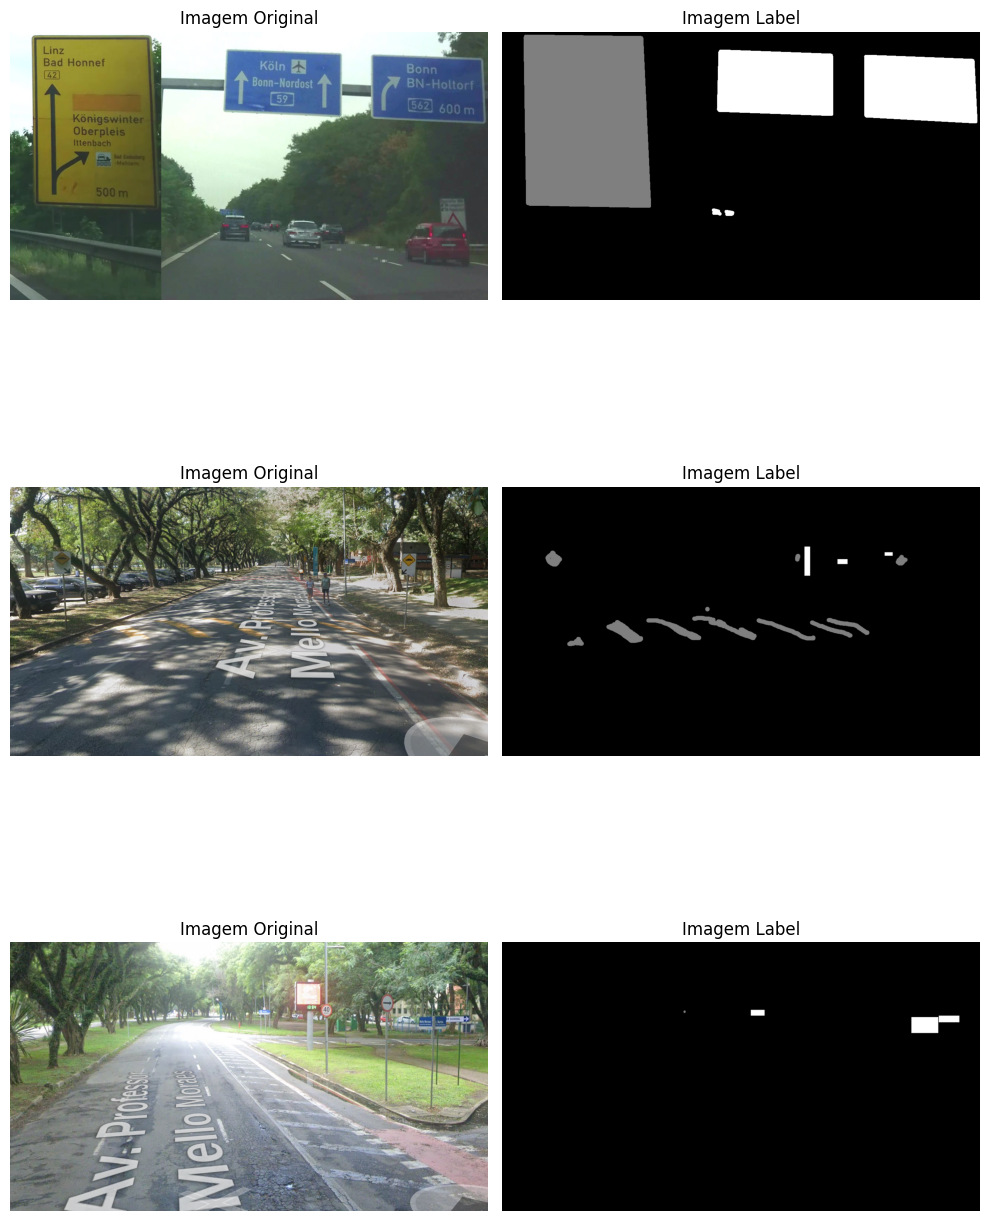

Imagem 1 - Width: 1280, Height: 720
Imagem 2 - Width: 1280, Height: 720
Imagem 3 - Width: 1280, Height: 720
Imagem 4 - Width: 1280, Height: 720
Imagem 5 - Width: 1280, Height: 720
Imagem 6 - Width: 1280, Height: 720


In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

# Insira o caminho da imagem
img1_path = '/home/markblz/Documents/aventura-politecnica/tcc/curupirAi/images/originals_rgb/combi_snap.png'
img2_path = '/home/markblz/Documents/aventura-politecnica/tcc/curupirAi/images/labels_rgb/combi_label.png'
img3_path = '/home/markblz/Documents/aventura-politecnica/tcc/curupirAi/images/originals_rgb/placas_USP3.png'
img4_path = '/home/markblz/Documents/aventura-politecnica/tcc/curupirAi/images/labels_rgb/placas_USP3label.png'
img5_path = '/home/markblz/Documents/aventura-politecnica/tcc/curupirAi/images/originals_rgb/placas_USP4.png'
img6_path = '/home/markblz/Documents/aventura-politecnica/tcc/curupirAi/images/labels_rgb/placas_USP4label.png'

# Carregar as imagens
img1 = PILImage.open(img1_path)
img2 = PILImage.open(img2_path)
img3 = PILImage.open(img3_path)
img4 = PILImage.open(img4_path)
img5 = PILImage.open(img5_path)
img6 = PILImage.open(img6_path)

# Função para obter e imprimir as dimensões de uma imagem
def print_image_dimensions(image, image_name):
    width, height = image.size
    print(f"{image_name} - Width: {width}, Height: {height}")

# Obter e imprimir as dimensões de cada imagem
print_image_dimensions(img1, 'Imagem 1')
print_image_dimensions(img2, 'Imagem 2')
print_image_dimensions(img3, 'Imagem 3')
print_image_dimensions(img4, 'Imagem 4')
print_image_dimensions(img5, 'Imagem 5')
print_image_dimensions(img6, 'Imagem 6')

# Agora reajusto todas para 1280x720
img1 = img1.resize((1280, 720))
img2 = img2.resize((1280, 720))
img3 = img3.resize((1280, 720))
img4 = img4.resize((1280, 720))
img5 = img5.resize((1280, 720))
img6 = img6.resize((1280, 720))

# replotar as imagens
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Plotar as imagens
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
axs[0, 1].set_title('Imagem Label')
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
axs[1, 0].set_title('Imagem Original')
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
axs[1, 1].set_title('Imagem Label')
axs[1, 1].axis('off')

axs[2, 0].imshow(img5)
axs[2, 0].set_title('Imagem Original')
axs[2, 0].axis('off')

axs[2, 1].imshow(img6)
axs[2, 1].set_title('Imagem Label')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Obter e imprimir as dimensões de cada imagem
print_image_dimensions(img1, 'Imagem 1')
print_image_dimensions(img2, 'Imagem 2')
print_image_dimensions(img3, 'Imagem 3')
print_image_dimensions(img4, 'Imagem 4')
print_image_dimensions(img5, 'Imagem 5')
print_image_dimensions(img6, 'Imagem 6')


In [2]:
# Converter todas as imagens para RGB
input_images = [img.convert('RGB') for img in [img1, img3, img5]]
label_images = [img.convert('RGB') for img in [img2, img4, img6]]

# Após a conversão para arrays numpy
for idx, (input_img, label_img) in enumerate(zip(input_images, label_images)):
    input_array = np.array(input_img).astype('float32') / 255.0
    label_array = np.array(label_img)

    print(f"Imagem {idx + 1} de entrada tem forma: {input_array.shape}")
    print(f"Imagem {idx + 1} de label tem forma: {label_array.shape}")

Imagem 1 de entrada tem forma: (720, 1280, 3)
Imagem 1 de label tem forma: (720, 1280, 3)
Imagem 2 de entrada tem forma: (720, 1280, 3)
Imagem 2 de label tem forma: (720, 1280, 3)
Imagem 3 de entrada tem forma: (720, 1280, 3)
Imagem 3 de label tem forma: (720, 1280, 3)


Usando dispositivo: cuda
Lendo e Preparando Dados de Treinamento


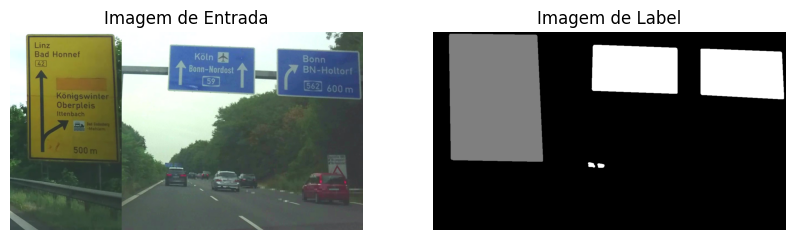

Dimensões da imagem de entrada: (720, 1280, 3)
Dimensões da imagem de label: (720, 1280, 3)
Estatísticas:
 - Categoria 1: 11.22 %
 - Categoria 2: 16.32 %
 - Fundo: 72.46 %
Tamanho dos inputs: torch.Size([921600, 3])
Tamanho dos targets: torch.Size([921600, 2])
Iniciando Treinamento
Época [1/400], Loss: 0.230407
Época [50/400], Loss: 0.230218
Época [100/400], Loss: 0.230026
Época [150/400], Loss: 0.229833
Época [200/400], Loss: 0.229641
Época [250/400], Loss: 0.229450
Época [300/400], Loss: 0.229259
Época [350/400], Loss: 0.229068
Época [400/400], Loss: 0.228877
Treinamento Concluído
Usando a Rede Treinada para Predição de Teste


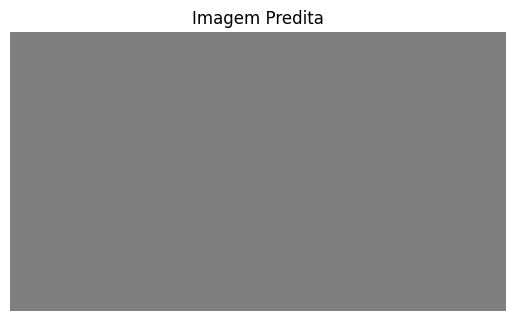

Resultados

Matriz de Pesos da Camada de Entrada para a Camada Oculta
[[ 0.00494438  0.36694437 -0.02342256]
 [ 0.48505113  0.20994933  0.21933125]
 [ 0.22249214 -0.1379245  -0.05997802]
 [-0.00531665 -0.4932788   0.53630954]
 [ 0.06054596 -0.5703293  -0.4556632 ]
 [-0.29652524  0.01644912 -0.23934998]
 [-0.56046206 -0.2253233  -0.01031651]]
Bias da Camada Oculta
[ 0.20073211  0.21605079  0.46659666 -0.41927764 -0.26559904 -0.42822677
 -0.2288518 ]

Matriz de Pesos da Camada Oculta para a Camada de Saída
[[-0.36516234  0.3303757  -0.2848997   0.11562852  0.07085209 -0.19201918
   0.26847112]
 [ 0.3448294  -0.18027984 -0.16186902 -0.21787164 -0.30210584 -0.12039103
   0.01942208]]
Bias da Camada de Saída
[-0.16198085  0.34684613]

Script Finalizado


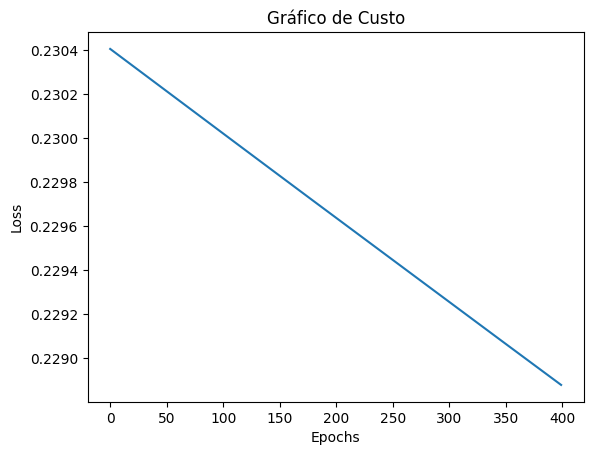

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Verificar se CUDA está disponível
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

#=============== Definição de Constantes =================

epochs = 400       # Número de épocas para treinar a rede
alpha = 0.0001    # Taxa de aprendizado
verbose = True     # Defina como True para habilitar o modo verbose

color2 = np.array([127, 127, 127], dtype=np.uint8)   # Cor para a categoria "color_2"
color1 = np.array([255, 255, 255], dtype=np.uint8)   # Cor para a categoria "color_1"
color0 = np.array([0, 0, 0], dtype=np.uint8)         # Cor para a categoria "other"

torch.manual_seed(123456)  # Definir seed para reprodutibilidade

#=============== Preparar Dados de Entrada =================
print('Lendo e Preparando Dados de Treinamento')

# Carregar imagens
# Certifique-se de que 'input_images' e 'label_images' são listas de imagens PIL.Image
input_image = input_images[0]
label_image = label_images[0]

# Mostrar as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Imagem de Entrada')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(label_image)
plt.title('Imagem de Label')
plt.axis('off')

plt.show()

# Verificar se as imagens têm o mesmo tamanho
if input_image.size != label_image.size:
    raise ValueError("A imagem de entrada e a imagem de label devem ter o mesmo tamanho.")

# Obter as dimensões
width, height = input_image.size

# Converter imagens para numpy arrays
input_array = np.array(input_image, dtype=np.float32)
label_array = np.array(label_image, dtype=np.uint8)

# Mostrar as formas dos arrays
print(f'Dimensões da imagem de entrada: {input_array.shape}')
print(f'Dimensões da imagem de label: {label_array.shape}')

# Normalizar a imagem de entrada para o intervalo [0,1]
input_array /= 255.0

# Preparar labels
labels = np.zeros((height, width, 2), dtype=np.float32) + 0.01

# Categoria "color_1" (pixels brancos no segundo canal com valor 255)
labels[:,:,0][label_array[:,:,1] == 255] = 0.99

# Categoria "color_2" (pixels cinza no primeiro canal com valor 127)
labels[:,:,1][label_array[:,:,0] == 127] = 0.99

# Mostrar estatísticas
num_category_one = (np.sum(labels[:,:,0] == 0.99) * 100) / (width * height)
num_category_two = (np.sum(labels[:,:,1] == 0.99) * 100) / (width * height)
print('Estatísticas:')
print(f' - Categoria 1: {num_category_one:.2f} %')
print(f' - Categoria 2: {num_category_two:.2f} %')
print(f' - Fundo: {100 - num_category_one - num_category_two:.2f} %')

# Reshape para formar um conjunto de dados
input_array = input_array.reshape(-1, 3)      # Três canais RGB
labels = labels.reshape(-1, 2)                # Dois neurônios de saída

# Converter para tensores do PyTorch
inputs = torch.from_numpy(input_array).to(device)
targets = torch.from_numpy(labels).to(device)

# Verificar tamanhos
print(f'Tamanho dos inputs: {inputs.shape}')
print(f'Tamanho dos targets: {targets.shape}')

#=============== Definir a Rede Neural =================

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Estrutura da rede [3, 7, 2]
        self.fc1 = nn.Linear(3, 7)
        self.fc2 = nn.Linear(7, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instanciar a rede
network = NeuralNetwork().to(device)

#=============== Definir Função de Perda e Otimizador =================

criterion = nn.MSELoss()
optimizer = optim.SGD(network.parameters(), lr=alpha)

#=============== Treinamento =================
print('Iniciando Treinamento')

cost_log = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = network(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    cost_log.append(loss.item())
    
    if verbose and ((epoch + 1) % 50 == 0 or epoch == 0):
        print(f'Época [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

print('Treinamento Concluído')

#=============== Predição =================
print('Usando a Rede Treinada para Predição de Teste')

# Usar a rede treinada nos dados de entrada
with torch.no_grad():
    outputs = network(inputs)
    predicted = outputs.round().cpu().numpy()

# Reshape para as dimensões da imagem
predicted = predicted.reshape(height, width, 2)

# Criar imagem de predição
prediction_image = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        if predicted[i, j, 1] == 1:
            prediction_image[i, j, :] = color2
        elif predicted[i, j, 0] == 1:
            prediction_image[i, j, :] = color1
        else:
            prediction_image[i, j, :] = color0

# Exibir a imagem de predição
plt.imshow(prediction_image)
plt.title('Imagem Predita')
plt.axis('off')
plt.show()

#=============== Gerar Resultados =================
print('Resultados')

# Obter os parâmetros da rede
nn_params = {}
nn_params['fc1_weight'] = network.fc1.weight.data.cpu().numpy()
nn_params['fc1_bias'] = network.fc1.bias.data.cpu().numpy()
nn_params['fc2_weight'] = network.fc2.weight.data.cpu().numpy()
nn_params['fc2_bias'] = network.fc2.bias.data.cpu().numpy()

print('\nMatriz de Pesos da Camada de Entrada para a Camada Oculta')
print(nn_params['fc1_weight'])
print('Bias da Camada Oculta')
print(nn_params['fc1_bias'])

print('\nMatriz de Pesos da Camada Oculta para a Camada de Saída')
print(nn_params['fc2_weight'])
print('Bias da Camada de Saída')
print(nn_params['fc2_bias'])

# Salvar os parâmetros da rede
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
torch.save(network.state_dict(), 'saved_models/NN_RGB_3_Categories_config.pth')

# Salvar o gráfico de custo
plt.figure()
plt.plot(cost_log)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Gráfico de Custo')
plt.savefig('cost_log.png')

# Salvar a imagem de predição
prediction_image_pil = Image.fromarray(prediction_image)
prediction_image_pil.save('NN_RGB_3_Categories_Predicted_Picture.png')

print('\nScript Finalizado')
